<a href="https://colab.research.google.com/github/sunkusaipurnima/DSML/blob/main/EDA/Aerofit%20-%20Descriptive%20Statistics%20%26%20Probability/src/Aerofit_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product
range including machines such as treadmills, exercise bikes, gym equipment, and
fitness accessories to cater to the needs of all categories of people.

# **Objective:**

1.   The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer
characteristics.
2.   Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.

3.   Construct two-way contingency tables for each AeroFit treadmill product and compute
all conditional and marginal probabilities and their insights/impact on the business.



# **About Data:**

*   Product: Product Purchased KP281, KP481, or KP781
*   Age: In years
*   Gender: Male/Female
*   Education: in years
*   MaritalStatus: single or partnered
*   Usage: average number of times the customer plans to use the treadmill each
    week
*   Income: annual income (in $)
*   Fitness: self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5
    is the excellent shape.
*   Miles: average number of miles the customer expects to walk/run each week

# Product Portfolio:


*   The KP281 is an entry-level treadmill that sells  for  $1,500.
*   The KP481 is for all mid-level runners that sell for $1,750.
*   The KP781 treadmill has advanced features that sell for $2,500.









# **Exploratory Data Analysis**


In [ ]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
#Loading dataset

df= pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    180
Name: count, dtype: int64

# **Observations:**

With basic analysis it is clear that ,

1.   Data has 9 features with alphanumeric data, with 180 different records.
2.   There is no missing data in the columns and also there are no duplcate
     records
     



# **Statistical Summary of Numerical Data**

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# **Observations:**


  1.**Age:** Minimum and Maximum age range of customers is [18,50] with an average age of 28.78 years.

  2.**Education:** Customers education range is [12,21] with an average of 16 years

  3.**Usage:** Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.

  4.**Fitnes:** On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness

  5.**Income:** The annual income of customers falls within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.

  6.**Miles:** Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

# **Statistical Summary of Categorical Data**

In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
df1=df[['Product','Gender','MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)


value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

# **Observations:**


**Product:**

1.44.44% of the customers have purchased KP281 product.

2.33.33% of the customers have purchased KP481 product.

3.22.22% of the customers have purchased KP781 product.

**Gender:**

1.57.78% of the customers are Male.

**MaritalStatus:**

1.59.44% of the customers are Partnered.


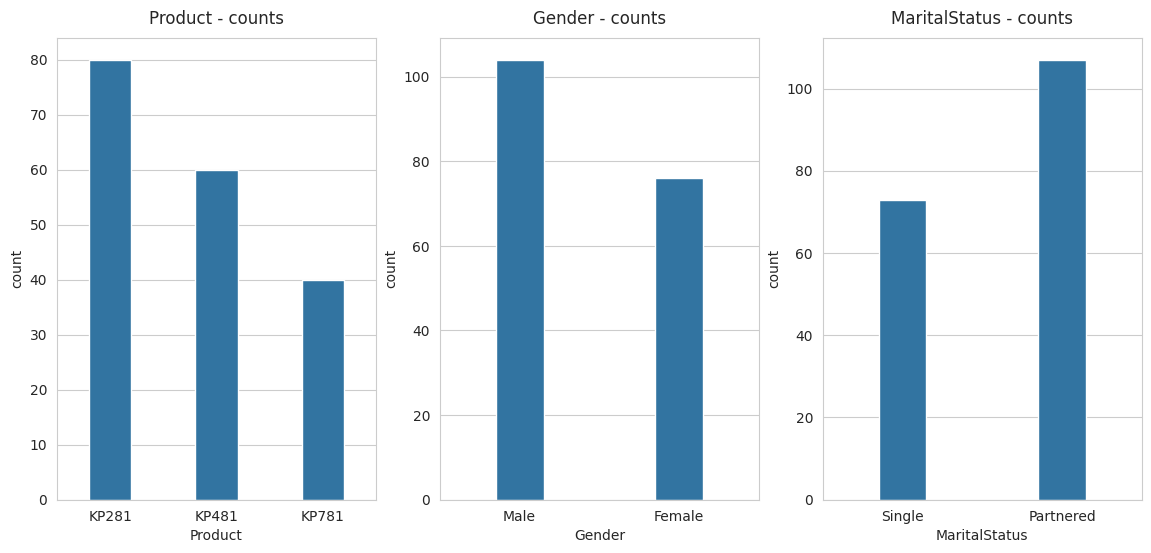

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
sns.countplot(data=df, x='Product', ax=axs[0],width=0.4)
sns.countplot(data=df, x='Gender', ax=axs[1],width=0.3)
sns.countplot(data=df, x='MaritalStatus', ax=axs[2],width=0.3)

axs[0].set_title("Product - counts", pad=10, fontsize=12)
axs[1].set_title("Gender - counts", pad=10, fontsize=12)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=12)
plt.show()


# **Univariate Analysis**

Understanding the distribution of the data for the quantitative attributes:

1.Age

2.Education

3.Usage

4.Fitness

5.Income

6.Miles

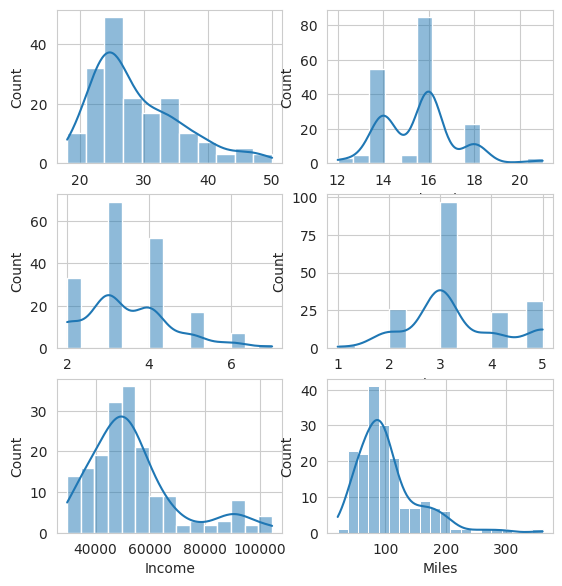

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2)
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

# **Outliers detection using BoxPlots**

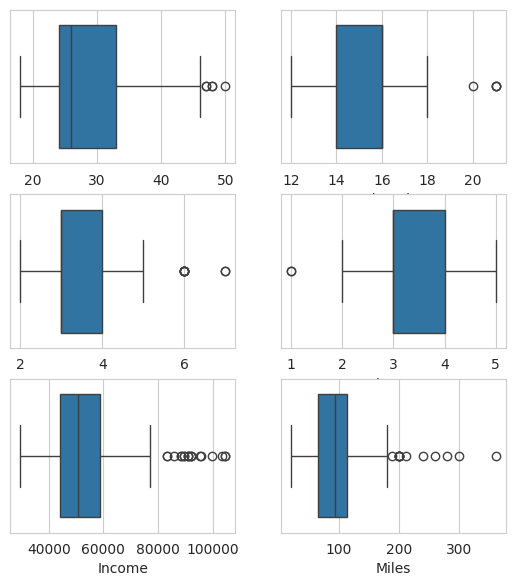

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2)
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

# **Obervations:**
Even from the boxplots it is quite clear that:

Age, Education and Usage are having very few outliers.
While Income and Miles are having more outliers.

# **Bivariate Analysis**

Checking if features - Gender or MaritalStatus have any effect on the product purchased.

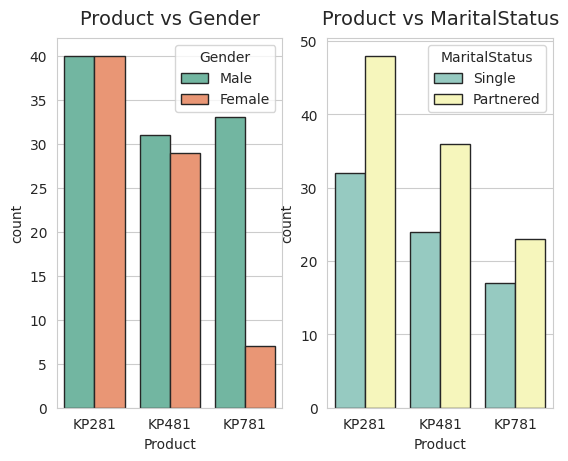

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

# **Observations:**

**Product vs Gender:**

1.Equal number of males and females have purchased KP281 product and Almost same for the product KP481

2.Most of the Male customers have purchased the KP781 product.

**Product vs MaritalStatus:**

Customer who is Partnered, is more likely to purchase the product.

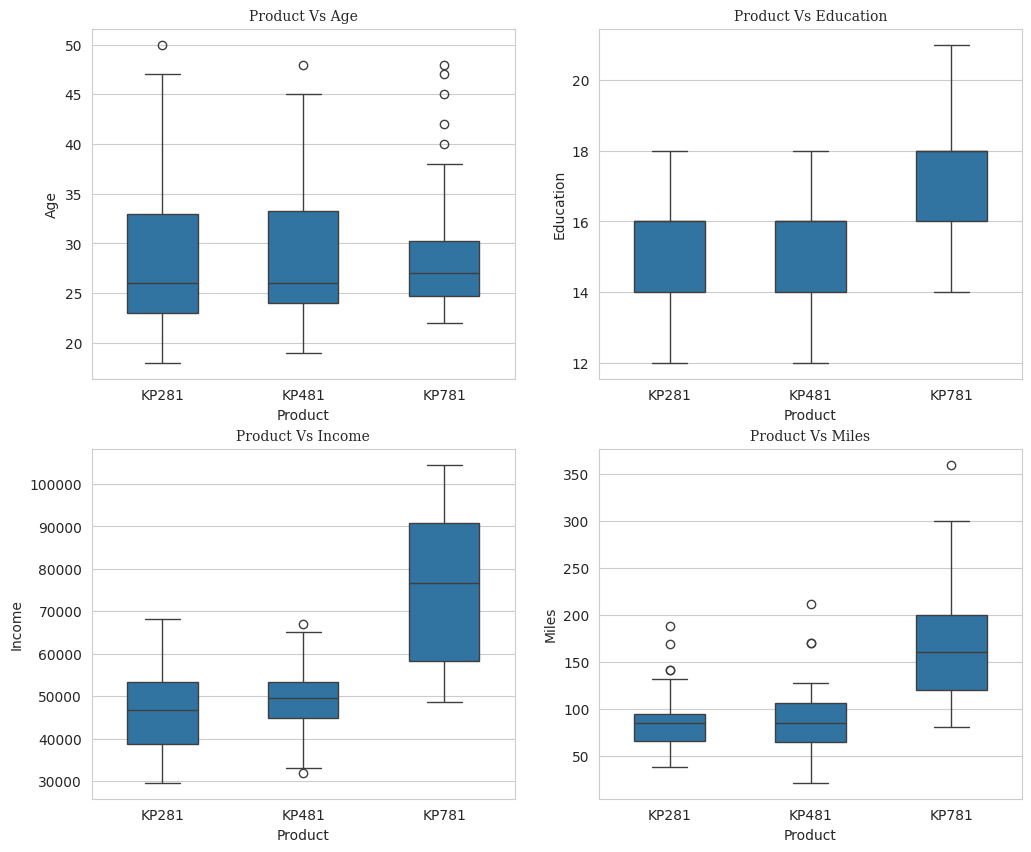

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (12,10))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:

    #plot position
    ax0 = fig.add_subplot(gs[i,j])

    #plot
    sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5)

    #plot title
    ax0.set_title(f'Product Vs {k}',{'font':'serif', 'size':10})



plt.show()


# **Observations:**

The analysis presented above clearly indicates a strong preference for the treadmill model KP781 among customers who possess higher education, higher income levels, and intend to engage in running activities exceeding 150 miles per week.

# **Correlation between Variables**

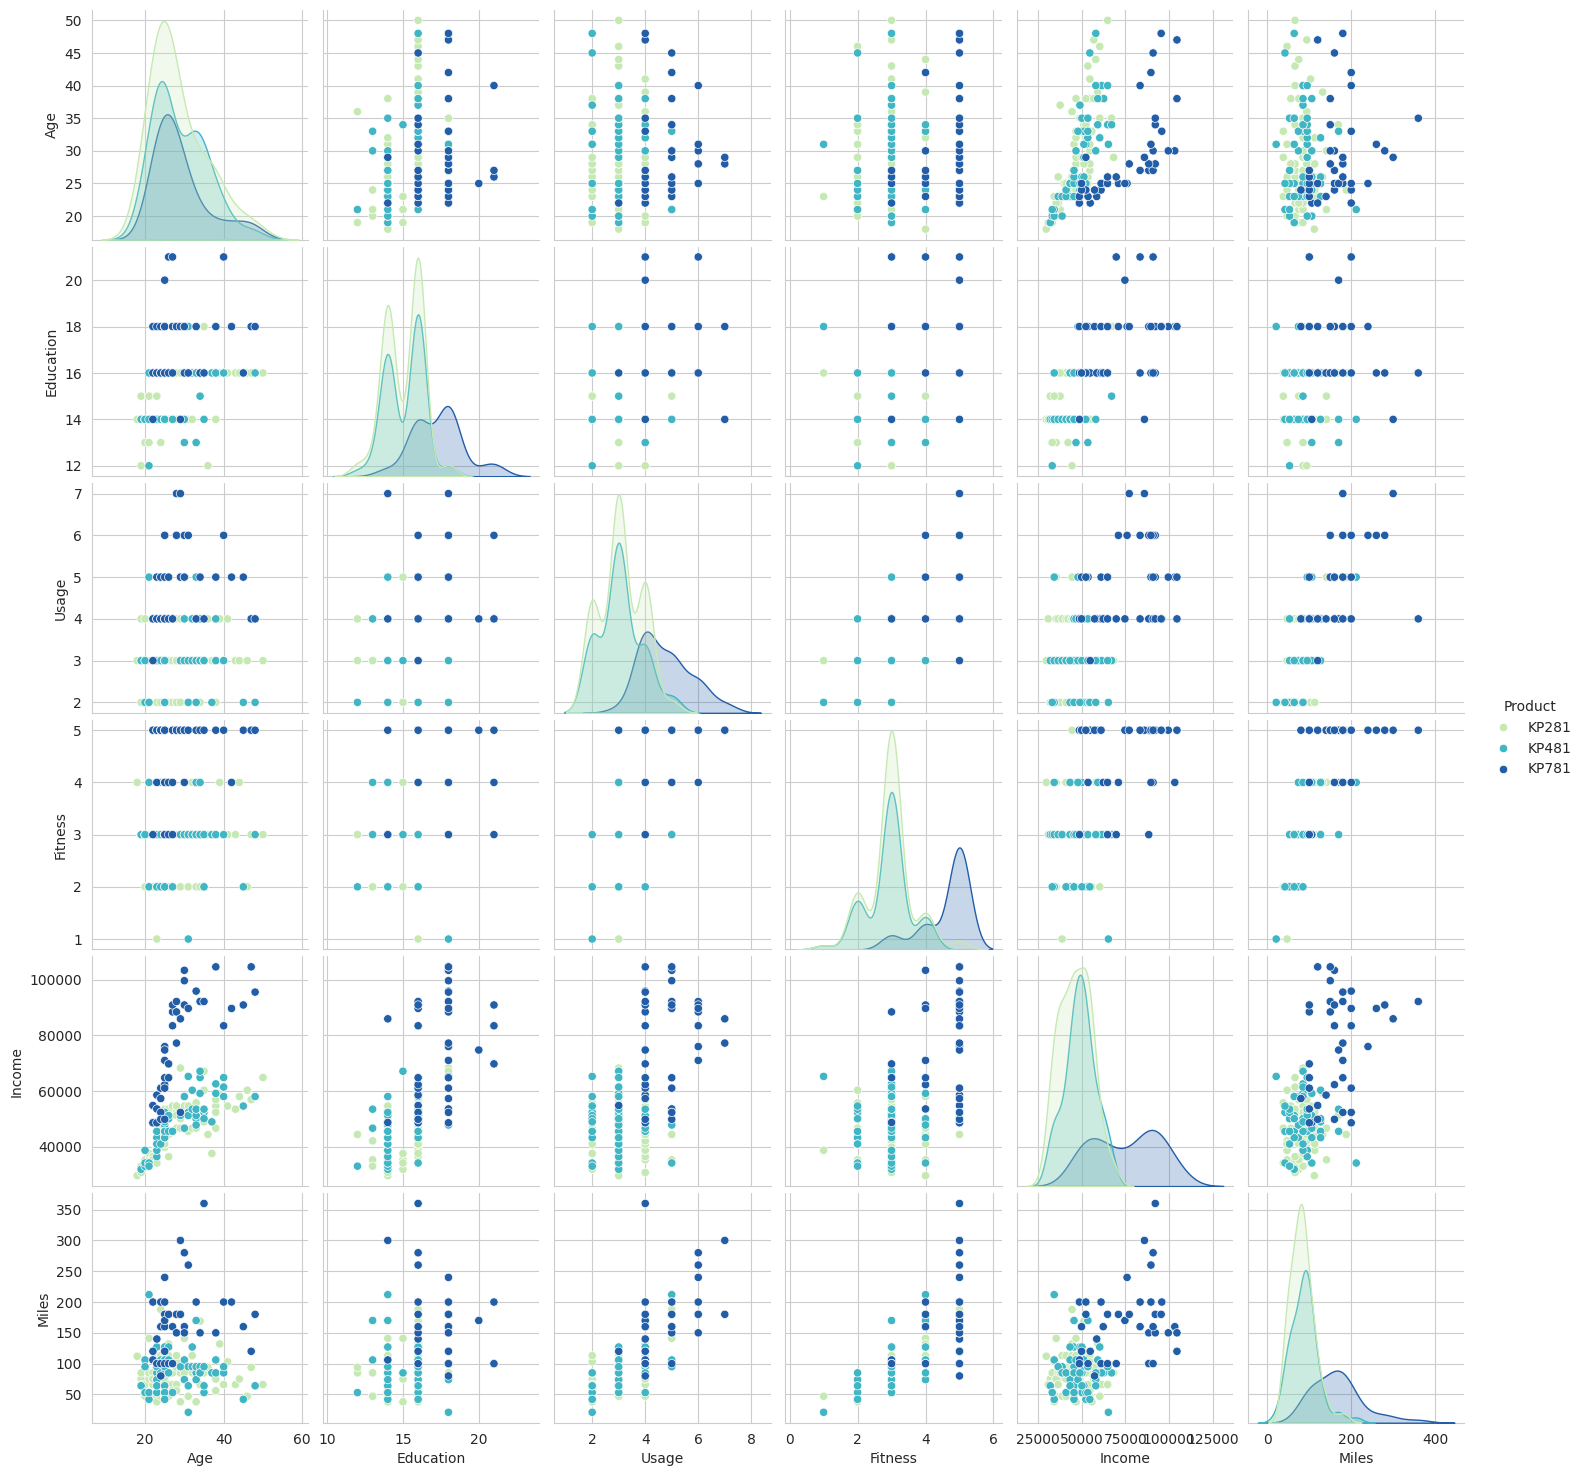

In [ ]:
sns.pairplot(df, hue ='Product', palette= 'YlGnBu')
plt.show()

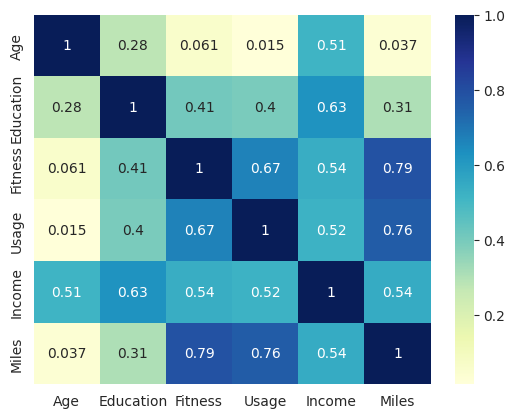

In [ ]:
corr_mat = df[['Age','Education','Fitness','Usage','Income','Miles']].corr()

plt.figure()

sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")

plt.show()

# **Observations:**

From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them

Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.

Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.



# **Adding new columns for better analysis**

Creating New Column and Categorizing values in Age,Education,Income and Miles to different classes for better visualization

 **Age Column:**

Categorizing the values in age column in 4 different buckets:

1.Young Adult: from 18 - 25

2.Adults: from 26 - 35

3.Middle Aged Adults: 36-45

4.Elder :46 and above

**Education Column:**

Categorizing the values in education column in 3 different buckets:

1.Primary Education: upto 12

2.Secondary Education: 13 to 15

3.Higher Education: 16 and above

**Income Column:**

Categorizing the values in Income column in 4 different buckets:

1.Low Income - Upto 40,000

2.Moderate Income - 40,000 to 60,000

3.High Income - 60,000 to 80,000

4.Very High Income - Above 80,000

**Miles column:**

Categorizing the values in miles column in 4 different buckets:

1.Light Activity - Upto 50 miles

2.Moderate Activity - 51 to 100 miles

3.Active Lifestyle - 101 to 200 miles

4.Fitness Enthusiast - Above 200 miles

In [ ]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)

#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder,Higher Education,Very High Income,Active Lifestyle


# **Computing Probability - Marginal, Conditional Probability**

**1.Probability of product purchase w.r.t. gender**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


# **Observations:**

1.The Probability of a treadmill being purchased by a female is 42%.

   The conditional probability of purchasing the treadmill model given that the customer is female is

     For Treadmill model KP281 - 22%

     For Treadmill model KP481 - 16%

     For Treadmill model KP781 - 4%

2.The Probability of a treadmill being purchased by a male is 58%.

   The conditional probability of purchasing the treadmill model given that the customer is male is -

       For Treadmill model KP281 - 22%

       For Treadmill model KP481 - 17%

       For Treadmill model KP781 - 18%

**2.Probability of product purchase w.r.t. Age**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


# **Observations:**


1.The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

  The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

      For Treadmill model KP281 - 19%

      For Treadmill model KP481 - 16%

      For Treadmill model KP781 - 9%

2.The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

   The conditional probability of purchasing the treadmill model given that the customer is Adult is -

     For Treadmill model KP281 - 18%

     For Treadmill model KP481 - 13%

     For Treadmill model KP781 - 9%

3.The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.

4.The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

**3.Probability of product purchase w.r.t. Education level:**

In [ ]:
pd.crosstab(index=df['Product'], columns=df['edu_group'],margins=True,normalize=True).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


# **Observations:**

1.The Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62%.

 The conditional probability of purchasing the treadmill model given that the customer has Higher Education is

    For Treadmill model KP281 - 23%

    For Treadmill model KP481 - 18%

    For Treadmill model KP781 - 21%

2.The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36%.

 The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -

    For Treadmill model KP281 - 21%

    For Treadmill model KP481 - 14%

    For Treadmill model KP781 - 1%

3.The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%.

**4.Probability of product purchase w.r.t. Income**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


**Observations:**

1.The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

 The conditional probability of purchasing the treadmill model given that the customer has Low Income is

    For Treadmill model KP281 - 13%

    For Treadmill model KP481 - 5%

    For Treadmill model KP781 - 0%

2.The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

 The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is

    For Treadmill model KP281 - 28%

    For Treadmill model KP481 - 24%

    For Treadmill model KP781 - 6%

3.The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

  The conditional probability of purchasing the treadmill model given that the customer has High Income is -

     For Treadmill model KP281 - 3%

     For Treadmill model KP481 - 4%

     For Treadmill model KP781 - 6%

 4.The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

  The conditional probability of purchasing the treadmill model given that the customer has High Income is -

     For Treadmill model KP281 - 0%

     For Treadmill model KP481 - 0%

     For Treadmill model KP781 - 11%    



 ** 5.Probability of product purchase w.r.t. Marital Status**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


**Observations:**

1.The Probability of a treadmill being purchased by a Married Customer is 59%.

 The conditional probability of purchasing the treadmill model given that the customer is Married is

    For Treadmill model KP281 - 27%

    For Treadmill model KP481 - 20%

    For Treadmill model KP781 - 13%

2.The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

  The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

    For Treadmill model KP281 - 18%

    For Treadmill model KP481 - 13%

    For Treadmill model KP781 - 9%

**6.Probability of product purchase w.r.t. Weekly Usage**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


**Observations:**

1.The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

  The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is

    For Treadmill model KP281 - 21%

    For Treadmill model KP481 - 17%

    For Treadmill model KP781 - 1%

2.The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

  The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is

    For Treadmill model KP281 - 12%

    For Treadmill model KP481 - 7%

    For Treadmill model KP781 - 10%

3.The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

  The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is

    For Treadmill model KP281 - 11%

    For Treadmill model KP481 - 8%

    For Treadmill model KP781 - 0%

**7.Probability of product purchase w.r.t. Customer Fitness.**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


**Observations:**

1.The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

 The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is

    For Treadmill model KP281 - 30%

    For Treadmill model KP481 - 22%

    For Treadmill model KP781 - 2%

2.The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.

3.The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

**8.Probability of product purchase w.r.t. weekly mileage**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


**Observations:**

1.The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

 The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is

    For Treadmill model KP281 - 7%

    For Treadmill model KP481 - 3%

    For Treadmill model KP781 - 0%

2.The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

   The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is

    For Treadmill model KP281 - 28%

    For Treadmill model KP481 - 22%

    For Treadmill model KP781 - 4%

3.The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

  The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is

    For Treadmill model KP281 - 10%

    For Treadmill model KP481 - 8%

    For Treadmill model KP781 - 15%

3.The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

# **Customer Profiling**

**Based on above analysis**

*Probability of purchase of KP281 = 44%*

*Probability of purchase of KP481 = 33%*

*Probability of purchase of KP781 = 22%*

**Customer Profile for KP281 Treadmill:**

    1.Age of customer mainly between 18 to 35 years with few between 35 to 50 years

    2.Education level of customer 13 years and above

    3.Annual Income of customer below USD 60,000

    4.Weekly Usage - 2 to 4 times

    5.Fitness Scale - 2 to 4

    6.Weekly Running Mileage - 50 to 100 miles

**Customer Profile for KP481 Treadmill:**

    1.Age of customer mainly between 18 to 35 years with few between 35 to 50 years

    2.Education level of customer 13 years and above

    3.Annual Income of customer between USD 40,000 to USD 80,000

    4.Weekly Usage - 2 to 4 times

    5.Fitness Scale - 2 to 4

    6.Weekly Running Mileage - 50 to 200 miles

**Customer Profile for KP781 Treadmill:**

    1.Gender - Male

    2.Age of customer between 18 to 35 years

    3.Education level of customer 15 years and above

    4.Annual Income of customer USD 80,000 and above

    5.Weekly Usage - 4 to 7 times

    6.Fitness Scale - 3 to 5
    
    7.Weekly Running Mileage - 100 miles and above

# **Recommendations**

1.Marketing Campaigns for KP781

The KP781 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.
Affordable Pricing and Payment Plans

2.Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.
User-Friendly App Integration

3.Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.



---



---





---



---



---



---

